# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd
import matplotlib

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [105]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx",na_values=['Does not apply','Unknown','NaN'],nrows=30000)

In [59]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81937 entries, 0 to 81936
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          81937 non-null  int64         
 1   Animal Name             81738 non-null  object        
 2   Animal Gender           81937 non-null  object        
 3   Primary Breed           81937 non-null  object        
 4   Secondary Breed         10547 non-null  object        
 5   Animal Dominant Color   81608 non-null  object        
 6   Animal Secondary Color  56919 non-null  object        
 7   Animal Third Color      17641 non-null  object        
 8   Animal Birth            81937 non-null  datetime64[ns]
 9   Spayed or Neut          81937 non-null  object        
 10  Guard or Trained        49576 non-null  object        
 11  Vaccinated              81937 non-null  object        
 12  Application Date        81937 non-null  dateti

In [10]:
df.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

So i understand this as dog licenses and then all the info about 
the dog. Dog name (many r very fun), dog colors, age, when the license
expires, zip code, vaccinated, spayed/neutered, guard or trained,
gender and breed.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1. I know its a simple question but i really
wanna know what dog breed has the most licenses just
cause I want to know. 
2. I also wanna know if there's some sort of connection
between like how many animals are spayed/neutered and vaccinated.
I find it super intresting that they can get a license while not vaccinated?
3. I also just wanna know what zipcode has the most doggos.
(I would totally click on the story "What zip code in NYC has the most dogs" with of course
the clarification of the licenses only

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [18]:
yip = df['Primary Breed'].value_counts().head(10)
yip

Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [ ]:
#I just removed it from all the results cuz boring

## What are the most popular dog names?

In [20]:
name = df['Animal Name'].value_counts().head(10)
name

Animal Name
UNKNOWN    203
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [34]:
amethyst = df['Animal Name'].value_counts()

In [35]:
print(amethyst.get('Star')) #I did my cat Star instead of my name cuz
#nothing showed up for Amethyst

12


In [36]:
print(amethyst.get('Max'))

202


In [37]:
print(amethyst.get('Maxwell'))

11


## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [49]:
doggo = df[df['Guard or Trained'] == 'Yes'].shape[0]
doggo
#Whaa how is there only 17 

17

In [53]:
dog_percent = 17/30000 * 100
print(f"{dog_percent:.2f}")

0.06


## What are the actual numbers?

In [54]:
doggo = df[df['Guard or Trained'] == 'Yes'].shape[0]
doggo

17

In [56]:
no_doggo = df[df['Guard or Trained'] == 'No'].shape[0]
no_doggo

19809

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [60]:
dogs = df['Guard or Trained'].value_counts().head(10)
dogs

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

**We're maing a big assumption** here that if they aren't listed as guard dogs, they probably aren't guard dogs.

Look up `.fillna`. Check your result with another `.value_counts()`

Mine is only showing No and Yes :( 

## What are the top dog breeds for guard dogs? 

In [64]:
doggo_yes = df[df['Guard or Trained'] == 'Yes']
breed = doggo_yes['Primary Breed'].value_counts()
breed

Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with `df['Animal Birth'].dt.year` or `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [65]:
df['Birth Year'] = df['Animal Birth'].dt.year

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29742 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           25223 non-null  object        
 4   Secondary Breed         3983 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [67]:
year = 2024
df['Age'] = year - df['Birth Year']

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29742 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           25223 non-null  object        
 4   Secondary Breed         3983 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [79]:
neighborhood = pd.read_csv('zipcodes-neighborhoods.csv')
neighborhood.info
merged = df.merge(neighborhood, left_on='Owner Zip Code', right_on='zip')
merged

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Birth Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,Upper West Side,10024,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,11,Southeast Bronx,10461,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16,Upper West Side,10025,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29568,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,14,West Queens,11372,Queens
29569,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,14,Southwest Queens,11417,Queens
29570,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,10,Southwest Brooklyn,11228,Brooklyn
29571,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,15,Northwest Brooklyn,11217,Brooklyn


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [83]:
Bronx = merged[merged['neighborhood'].str.contains('Bronx')]
Bronx_Dogs = Bronx.groupby('neighborhood')['Animal Name'].value_counts()
Bronx_Dogs

neighborhood            Animal Name
Bronx Park and Fordham  Max            4
                        Bella          3
                        Charlie        3
                        Gizmo          3
                        Luna           3
                                      ..
Southeast Bronx         spuds salzo    1
                        toby           1
                        unknowed       1
                        unknown        1
                        zeus           1
Name: count, Length: 1594, dtype: int64

In [84]:
Brooklyn = merged[merged['neighborhood'].str.contains('Brooklyn')]
Brooklyn_Dogs = Brooklyn.groupby('neighborhood')['Animal Name'].value_counts()
Brooklyn_Dogs

neighborhood        Animal Name
Central Brooklyn    Ruby           5
                    UNKNOWN        5
                    Brooklyn       4
                    Max            4
                    Princess       4
                                  ..
Southwest Brooklyn  happy          1
                    rocky          1
                    toby wood      1
                    unkown         1
                    violet         1
Name: count, Length: 3294, dtype: int64

In [86]:
UES = merged[merged['neighborhood'].str.contains('Upper East Side')]
UES_Dogs = UES.groupby('neighborhood')['Animal Name'].value_counts()
UES_Dogs

neighborhood     Animal Name   
Upper East Side  Charlie           19
                 Bella             12
                 NO NAME           11
                 Lola              10
                 Lucy              10
                                   ..
                 sOPHIE             1
                 sammy friedman     1
                 sophie             1
                 tommy              1
                 topper             1
Name: count, Length: 1382, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [92]:
common = (merged.groupby('neighborhood')['Primary Breed'])
#common.value_counts()
#I didn't really know where to go from here
#So i asked ChatGPT
common = (merged.groupby('neighborhood')['Primary Breed']
.apply(lambda breeds: breeds.value_counts().idxmax()))
common

neighborhood
Borough Park                                        Yorkshire Terrier
Bronx Park and Fordham                              Yorkshire Terrier
Bushwick and Williamsburg                           Yorkshire Terrier
Canarsie and Flatlands                                       Shih Tzu
Central Bronx                                       Yorkshire Terrier
Central Brooklyn                                             Shih Tzu
Central Harlem                                              Chihuahua
Central Queens                                      Yorkshire Terrier
Chelsea and Clinton                                         Chihuahua
East Harlem                                         Yorkshire Terrier
East New York and New Lots                          Yorkshire Terrier
Flatbush                                                     Shih Tzu
Gramercy Park and Murray Hill                       Yorkshire Terrier
Greenpoint                                                  Chihuahua
Greenwi

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

Be conscious of case-sensitivity! `WHITE` and `white` aren't the same, so you might need to standardize first.

Using `.isin` is going to be very helpful.

In [137]:
#Why can't i do these all together is  there a way
#to do it all togetherm
merged['Animal Dominant Color']= merged['Animal Dominant Color'].str.lower()
merged['Animal Secondary Color'] = merged['Animal Secondary Color'].str.lower()
merged['Animal Third Color'] = merged['Animal Third Color'].str.lower()


In [138]:
monochrome = ['black','white','grey']
merged['monochrome'] = merged[['Animal Dominant Color', 'Animal Secondary Color', 'Animal Third Color'].fillna('')]
merged['monochrome'] = merged[['Animal Dominant Color', 'Animal Secondary Color', 'Animal Third Color']].isin(monochrome).any()

AttributeError: 'list' object has no attribute 'fillna'

In [127]:
monochrome_doggos = merged[['Animal Name', 'Animal Dominant Color', 'Animal Secondary Color', 'Animal Third Color', 'monochrome']].head()

KeyError: "['monochrome'] not in index"

In [128]:
monochrome_doggos #errmmmmmmm. idk what went wrong. i used the NaN takeaway option too. I may be moving along to chatgpt. 
merged[['Animal Dominant Color', 'Animal Secondary Color', 'Animal Third Color']] = merged[
    ['Animal Dominant Color', 'Animal Secondary Color', 'Animal Third Color']
].fillna('').astype(str)

merged['monochrome'] = merged[
    ['Animal Dominant Color', 'Animal Secondary Color', 'Animal Third Color']
].apply(lambda row: any(color in monochrome_colors for color in row), axis=1)
#anddddd chatgpt was unhelpful and made me more confused actually


NameError: name 'monochrome_colors' is not defined

## How many dogs are in each borough? Plot it in a graph.

<Axes: ylabel='borough'>

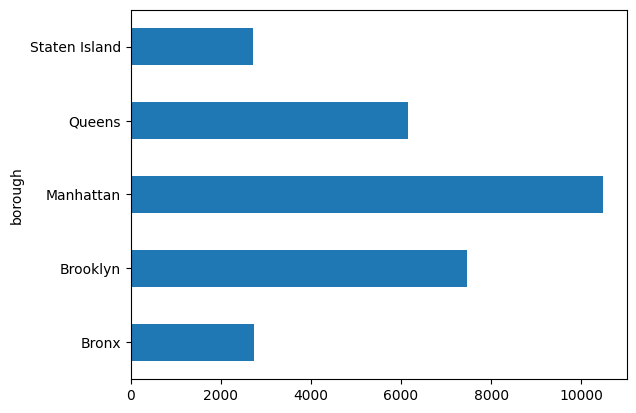

In [124]:
borough_dogs = merged.groupby('borough').size()
borough_dogs.plot(kind='barh')
#this one was much easier than the one above which I cant figure out :(

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [136]:
population = pd.read_csv('boro_population.csv')
population.info
merged2 = merged.merge(population, left_on='borough', right_on='borough')
merged2

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Application Date,License Issued Date,License Expired Date,Birth Year,Age,neighborhood,zip,borough,population,area_sqmi
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,brown,black,,2007-11-01,Yes,...,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,Upper West Side,10024,Manhattan,1644518,23
1,10461,Indie Zephir,M,Rottweiler,NaN,black,tan,,2013-04-01,No,...,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,11,Southeast Bronx,10461,Bronx,1455444,42
2,10013,Bilal,M,Australian Cattledog,NaN,rust,,,2014-09-01,Yes,...,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013,Manhattan,1644518,23
3,10025,Buddy,M,NaN,Cockapoo,blond,white,,2008-04-01,Yes,...,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16,Upper West Side,10025,Manhattan,1644518,23
4,10013,Ali,M,Basenji,NaN,black,,,2014-01-01,No,...,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013,Manhattan,1644518,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29568,11372,Bella,F,NaN,Goldendoodle,black,tan,,2010-07-01,Yes,...,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,14,West Queens,11372,Queens,2339150,109
29569,11417,Sadie,F,"Schnauzer, Miniature",NaN,tan,black,,2010-05-01,Yes,...,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,14,Southwest Queens,11417,Queens,2339150,109
29570,11228,unknown,M,Pomeranian,NaN,brown,,,2014-03-01,Yes,...,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,10,Southwest Brooklyn,11228,Brooklyn,2636735,71
29571,11217,daisy,F,NaN,NaN,white,brown,,2009-01-01,Yes,...,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,15,Northwest Brooklyn,11217,Brooklyn,2636735,71


In [158]:
borough_dogs = merged.groupby('borough').size().reset_index(name='dog_count')
populations = pd.merge(merged2, borough_dogs, on='borough', how='left')
dog_capita = populations['capita'] = populations['dog_count'] / populations['population']
dog_capita


0        0.006371
1        0.001888
2        0.006371
3        0.006371
4        0.006371
           ...   
29568    0.002631
29569    0.002631
29570    0.002832
29571    0.002832
29572    0.006371
Length: 29573, dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [152]:
import matplotlib.pyplot as plt
breed_counts = merged.groupby(['borough', 'Primary Breed']).size().reset_index(name='count')

In [149]:
top_breeds = breed_counts.sort_values(['borough', 'count'], ascending=[True, False])

In [150]:
top_5_breeds_per_borough = top_breeds.groupby('borough').head(5)

In [153]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

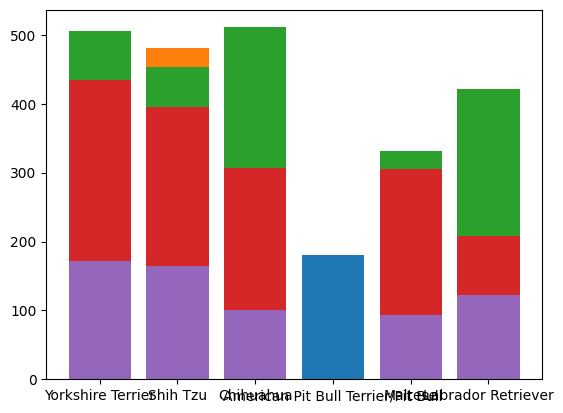

In [154]:
for borough in top_5_breeds_per_borough['borough'].unique():
    borough_data = top_5_breeds_per_borough[top_5_breeds_per_borough['borough'] == borough]
    plt.bar(borough_data['Primary Breed'], borough_data['count'], label=borough)


In [ ]:
#this is what chatgpt spit out :(